<a href="https://colab.research.google.com/github/ParvinGhaffarzadeh/Kmeans_clustering_with_Elbow_Method_and_Silhouette/blob/main/Kmeans_clustering_with_Elbow_Method_and_Silhouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [ ]:
df = pd.read_excel('C:/Users/asus/Desktop/samane/datametir.xlsx')


df.head(5)

,arzeshkhodro,haghbime,mablaghkhesarat,tedadsarneshin,jensiatbimegozar,tedadkhesarat,age,noeplk,arzshkhodro,moredestefade,city,Rsalesakht
0,400000000,2880000,0,2,1,0,2,1,2,1,26,8
1,500000000,3400000,0,2,1,0,1,1,2,1,16,8
2,80000000,976800,0,2,1,0,2,4,1,1,12,8
3,720000000,11520009,0,2,1,0,2,1,3,1,23,8
4,25000000,300000,0,2,1,0,3,4,1,1,16,7


In [ ]:
df.isnull().sum()

arzeshkhodro        0
haghbime            0
mablaghkhesarat     0
tedadsarneshin      0
jensiatbimegozar    0
tedadkhesarat       0
age                 0
noeplk              0
arzshkhodro         0
moredestefade       0
city                0
Rsalesakht          0
dtype: int64

In [ ]:
# selecting features
x = df.iloc[:,:].values

In [ ]:
# Elbow Method

score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

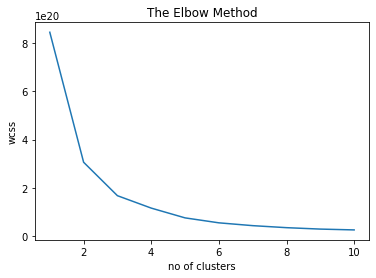

In [ ]:
# plotting the score

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8711205194265247
For n_clusters = 3 The average silhouette_score is : 0.8392381785452863
For n_clusters = 4 The average silhouette_score is : 0.8088183394061462
For n_clusters = 5 The average silhouette_score is : 0.637004386293147
For n_clusters = 6 The average silhouette_score is : 0.6372912536260721
For n_clusters = 7 The average silhouette_score is : 0.6386444339336893
For n_clusters = 8 The average silhouette_score is : 0.6390062860686422
For n_clusters = 9 The average silhouette_score is : 0.5329167774898432
For n_clusters = 10 The average silhouette_score is : 0.5390475707453083


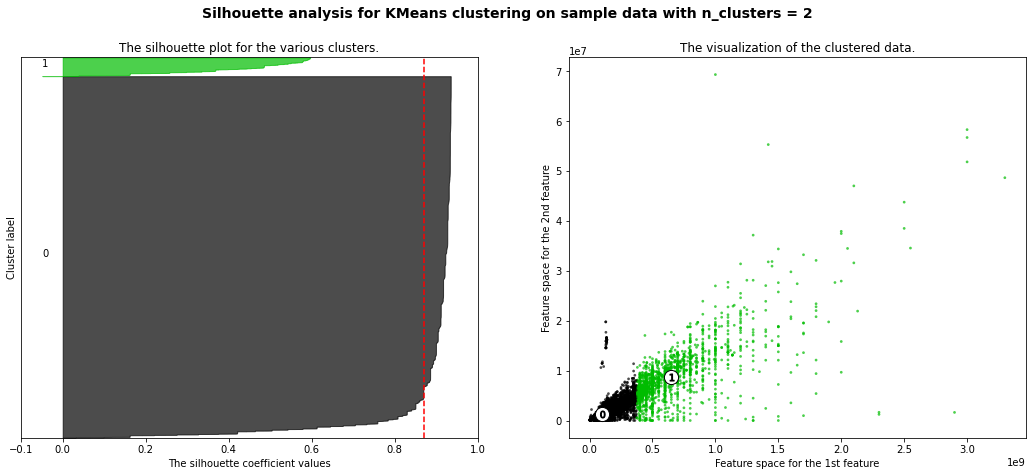

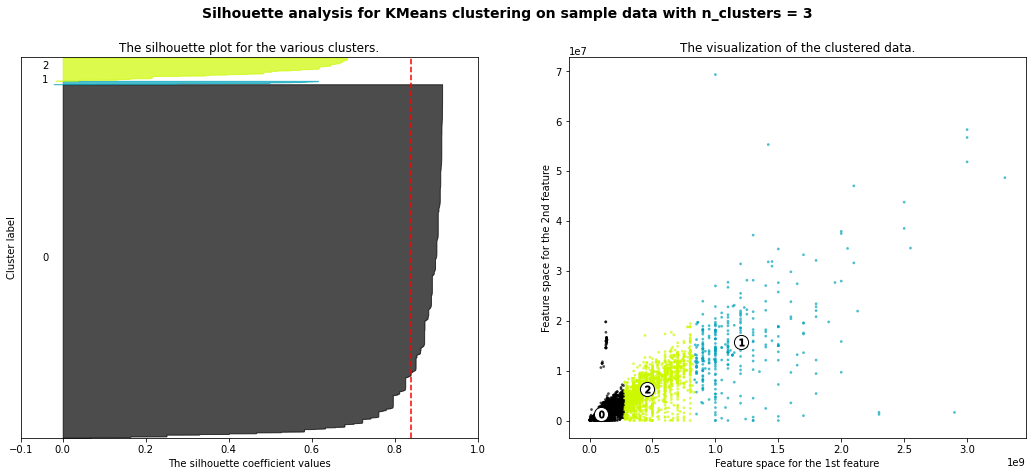

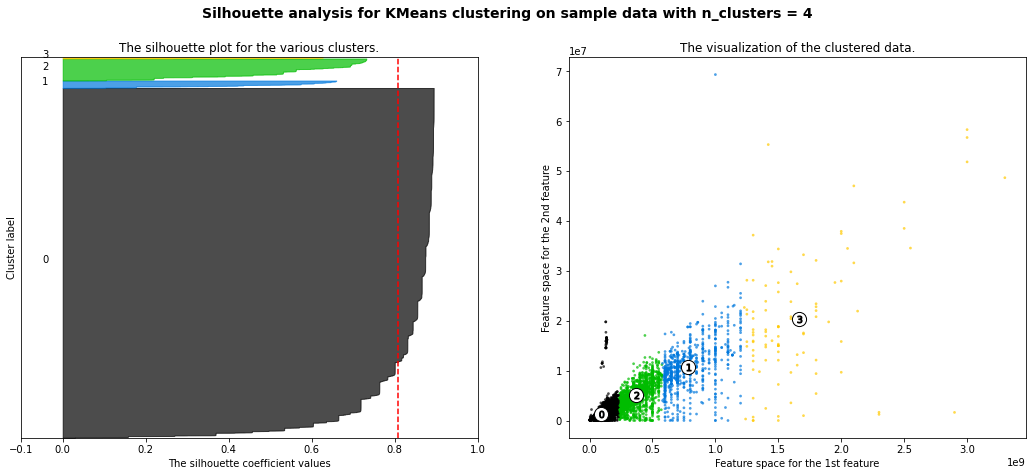

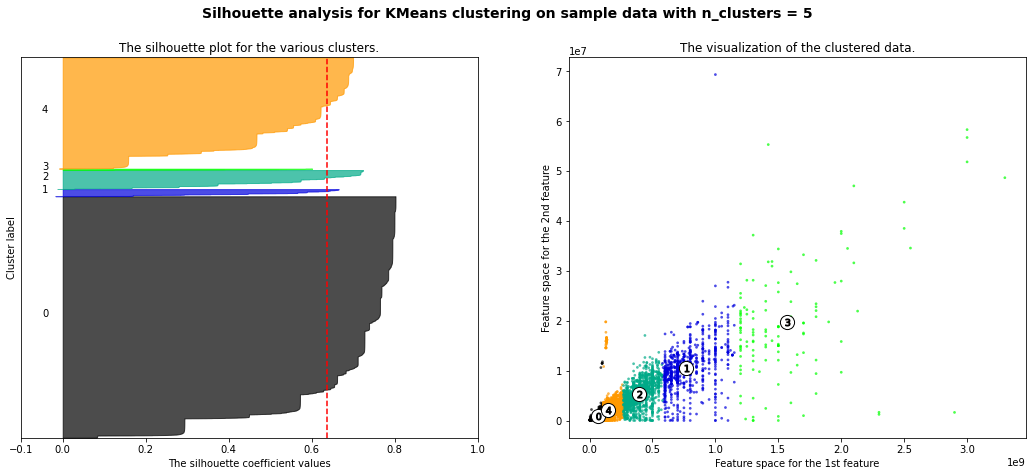

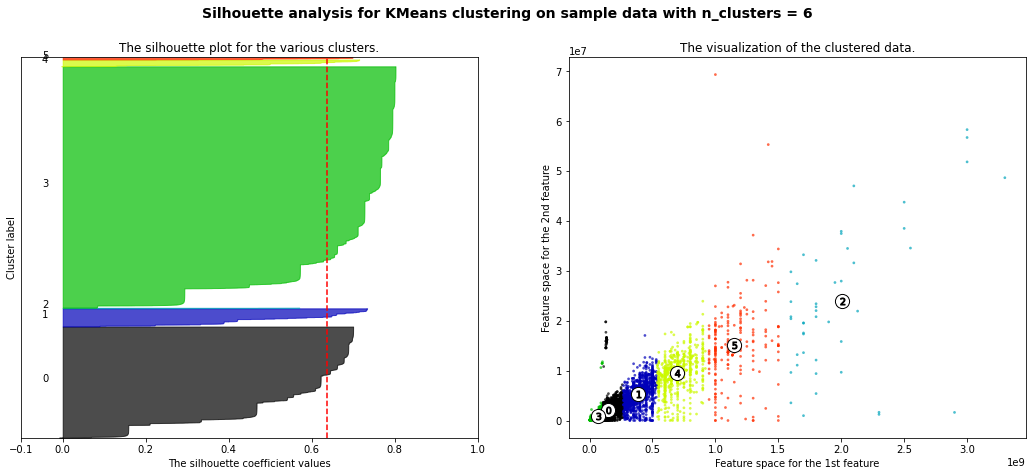

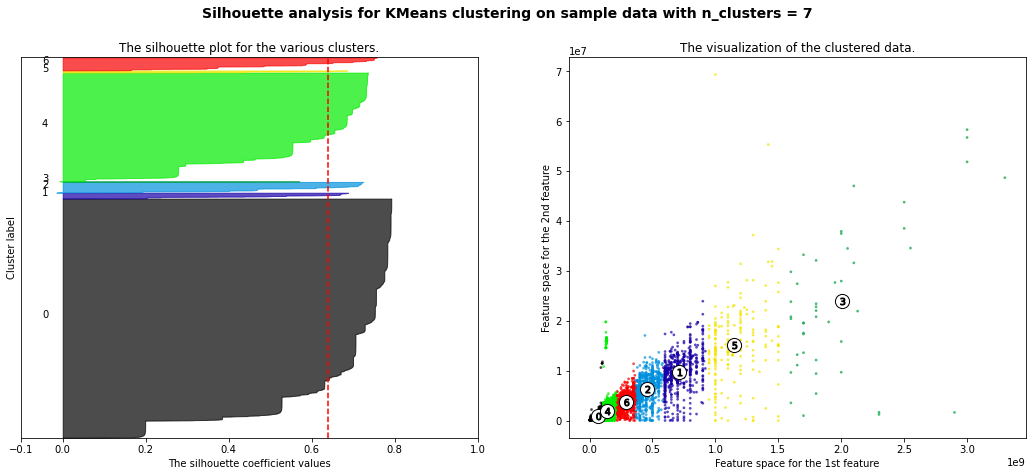

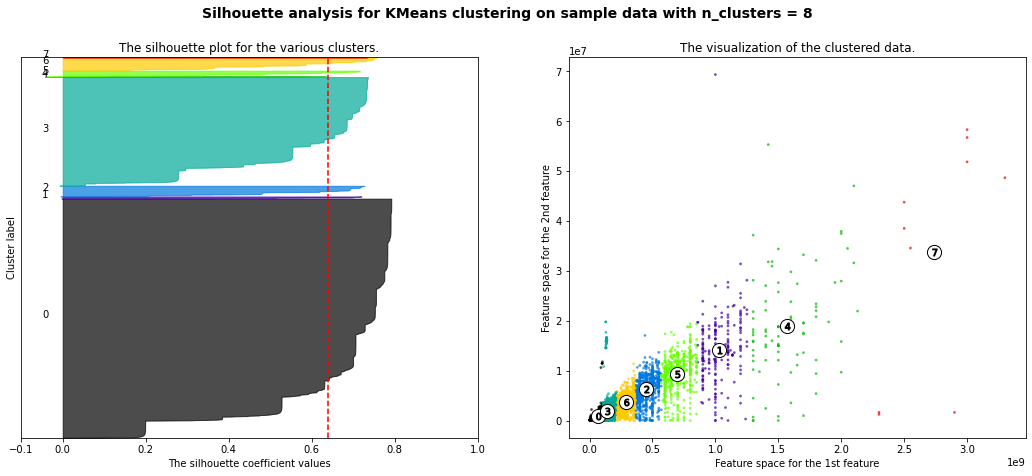

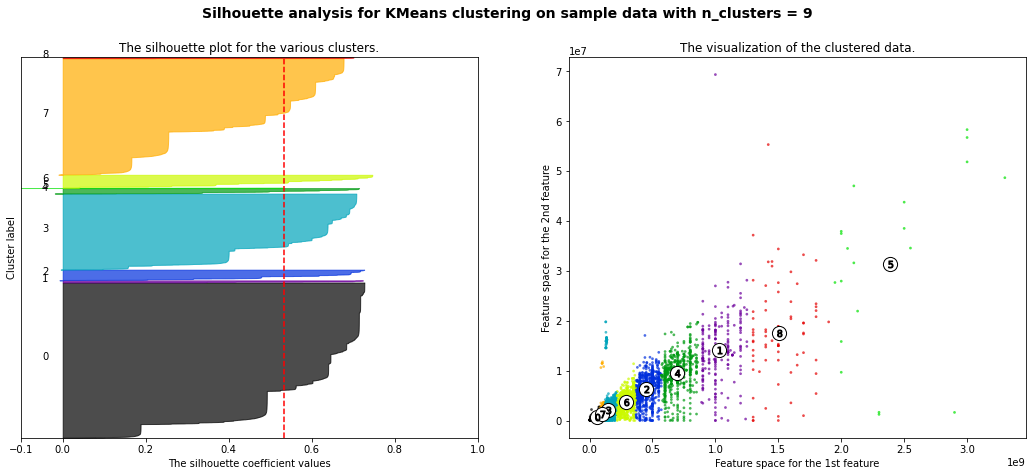

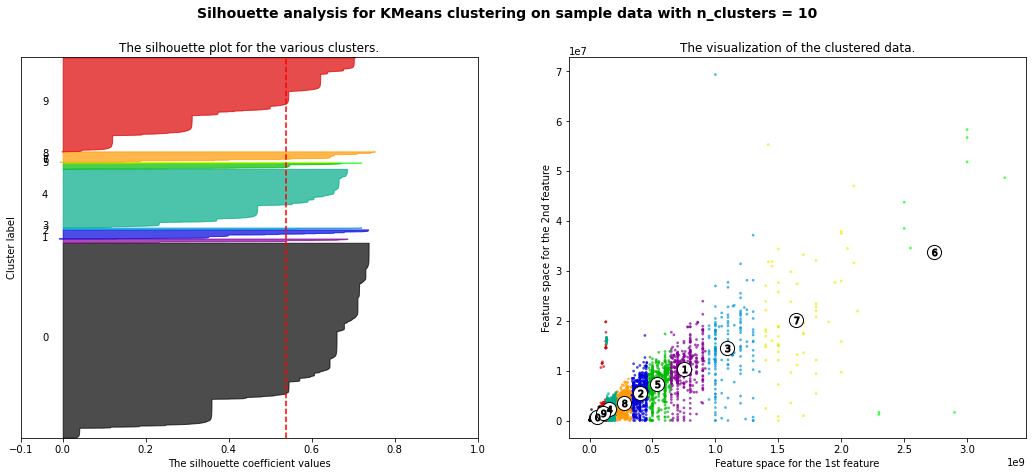

In [ ]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()